## Presentation Delivery Feedback Tool

This tool helps students improve their spoken delivery when practicing college presentations. 
It provides objective feedback on three key areas:

- **Speech Rate**: How fast or slow you speak
- **Inflection**: Pitch variation over time (monotone vs expressive)
- **Vocal Energy**: Loudness of your voice, to assess projection

By analysing short recorded excerpts (30–90 seconds), this tool aims to support more confident, clear, and engaging delivery.



In [1]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached soundfile-0.13.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.2 MB/s eta 0:00:00a 0:00:01
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 10.4 MB/s eta 0:00:0000:0100:01
Using cached soundfile-0.13.1-py2.py3-none-macosx_10_9_x86_64.whl (1

In [7]:
!pip install SpeechRecognition

  Using cached speechrecognition-3.14.2-py3-none-any.whl.metadata (30 kB)
Using cached speechrecognition-3.14.2-py3-none-any.whl (32.9 MB)


In [8]:
import librosa
import matplotlib.pyplot as plt
from pydub import AudioSegment, silence
import numpy as np
import speech_recognition as sr

In [112]:
# load audio 
file_path = "/Users/treasaj2/Downloads/orla_first_presentation.wav"
y, sample_rate = librosa.load(file_path)
audio = AudioSegment.from_wav(file_path)
duration_seconds = len(audio) / 1000
print(f"Audio duration: {duration_seconds:.2f} seconds")

Audio duration: 37.19 seconds


In [113]:
recognizer = sr.Recognizer()
with sr.AudioFile("/Users/treasaj2/Downloads/orla_first_presentation.wav") as source:
    audio_data = recognizer.record(source)
    transcript = recognizer.recognize_google(audio_data)

In [114]:
# transcribe and count words
print("Transcript:", transcript)
word_count = len(transcript.split())
duration_minutes = duration_seconds / 60
wpm = word_count / duration_minutes
print(f"Speech Rate: {wpm:.1f} words per minute")


Transcript: artificial intelligence is a rapidly transforming Industries from healthcare and finance to transportation in education however as AI systems become like more autonomous ethical concerns a girl around issues like bias transparency and accountability this highlights the need for explainable AI systems that not only are make decisions but also left provide like human understandable reasoning
Speech Rate: 90.3 words per minute


### Pitch Inflection Analysis

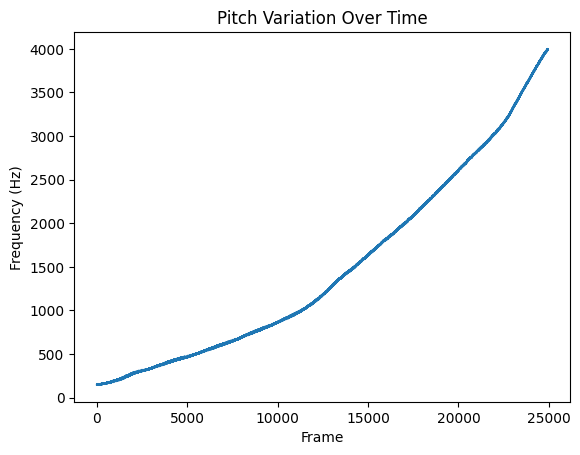

In [115]:
# extract pitch using librosa piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sample_rate)
pitch_values = [pitches[i, j] for i in range(pitches.shape[0])
                for j in range(pitches.shape[1]) if pitches[i, j] > 0]

pitch_min = min(pitch_values)
pitch_max = max(pitch_values)
pitch_range = pitch_max - pitch_min

plt.plot(pitch_values)
plt.title("Pitch Variation Over Time")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.show()


### Vocal Energy Analysis

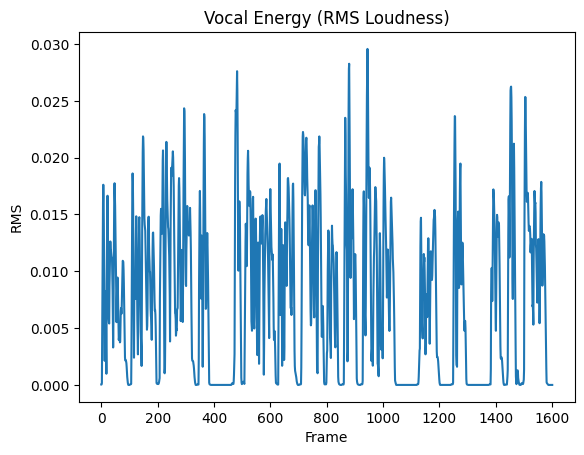

In [116]:
rms = librosa.feature.rms(y=y)[0]
avg_rms = np.mean(rms)

plt.plot(rms)
plt.title("Vocal Energy (RMS Loudness)")
plt.xlabel("Frame")
plt.ylabel("RMS")
plt.show()


In [117]:
# Detect silent segments (threshold and min_silence_len may need tuning)
silences = silence.detect_silence(audio, min_silence_len=300, silence_thresh=-40)

# Convert from ms to seconds
pause_durations = [(end - start) / 1000 for start, end in silences]
total_pause_time = sum(pause_durations)
total_duration = len(audio) / 1000
pause_ratio = total_pause_time / total_duration

print(f"Total pause time: {total_pause_time:.2f} s")
print(f"Pause ratio: {pause_ratio:.2f}")

Total pause time: 28.54 s
Pause ratio: 0.77


In [118]:
filler_words = ["um", "uh", "like", "you know", "so", "basically", "eh"]
transcript_lower = transcript.lower()

filler_count = sum(transcript_lower.count(filler) for filler in filler_words)
total_words = len(transcript_lower.split())
filler_rate = filler_count / total_words

print(f"Filler Words: {filler_count}")
print(f"Filler Rate: {round(filler_rate, 2)}")


Filler Words: 6
Filler Rate: 0.11


In [121]:
def give_feedback(wpm, pitch_min, pitch_max, avg_rms, pause_ratio, filler_count, filler_rate):
    print("Presentation Delivery Feedback\n")

    # speech rate
    if 95 <= wpm <= 130:
        print(f"- Speech Rate: {wpm:.0f} WPM (ideal pace)")
        wpm_tip = "- Good pace! Easy to follow."
    elif wpm < 95:
        print(f"- Speech Rate: {wpm:.0f} WPM ⚠️ (a bit slow)")
        wpm_tip = "- Try increasing your pace slightly to keep momentum."
    else:
        print(f"- Speech Rate: {wpm:.0f} WPM ⚠️ (a bit fast)")
        wpm_tip = "- Try slowing down a bit to improve clarity."

    # pitch range
    pitch_range = pitch_max - pitch_min
    if pitch_range > 50:
        print(f"- Pitch Range: {pitch_min:.0f} Hz – {pitch_max:.0f} Hz (good variation)")
        pitch_tip = "- Your pitch variation shows expressive delivery."
    else:
        print(f"- Pitch Range: {pitch_min:.0f} Hz – {pitch_max:.0f} Hz ⚠️ (flat)")
        pitch_tip = "- Try varying your pitch to avoid sounding monotone."

    # vocal energy
    if avg_rms > 0.02:
        print(f"- Vocal Energy: {avg_rms:.4f} (strong projection)")
        energy_tip = "- Great vocal energy! You sound confident."
    elif avg_rms > 0.01:
        print("- Your voice is a bit quiet — try projecting slightly more.")
        energy_tip = "- Speak louder to ensure you're heard clearly."
    else:
        print("- Your voice was very soft - speak louder to be better understood.")
        energy_tip = "- Speak louder to ensure you're heard clearly."

    
    # pause ratio

    if 0.15 <= pause_ratio <= 0.35:
        print("- Good use of pauses - clear and natural pacing.")
        pause_tip = "- Nice use of pauses — your delivery sounds natural."
    elif pause_ratio < 0.15:
        print("- Consider adding more pauses — your delivery may feel rushed.")
        pause_tip = "- Add more pauses to give your words time to land."
    else:
        print("- Too many pauses — try to smooth out your delivery.")
        pause_tip = "- Try reducing pauses to maintain flow."

    # filler word usage
    if filler_rate < 0.09:
        print(f"- Filler Words: {filler_count} (excellent fluency)")
        filler_tip = "- Great job! You rarely used filler words."
    elif filler_rate < 0.1:
        print(f"- Filler Words: {filler_count} ⚠️ (some present)")
        filler_tip = "- Try pausing silently instead of using 'um' or 'like'."
    else:
        print(f"- Filler Words: {filler_count} (frequent usage)")
        filler_tip = "- Work on replacing filler words with silent pauses to improve fluency."



    print("\nFeedback Tips:")
    print(f"{wpm_tip}")
    print(f"{pitch_tip}")
    print(f"{energy_tip}")
    print(f"{pause_tip}")
    print(f"{filler_tip}")

In [122]:
give_feedback(wpm, pitch_min, pitch_max, avg_rms, pause_ratio, filler_count, filler_rate)

Presentation Delivery Feedback

- Speech Rate: 90 WPM ⚠️ (a bit slow)
- Pitch Range: 145 Hz – 4000 Hz (good variation)
- Your voice was very soft - speak louder to be better understood.
- Too many pauses — try to smooth out your delivery.
- Filler Words: 6 (frequent usage)

Feedback Tips:
- Try increasing your pace slightly to keep momentum.
- Your pitch variation shows expressive delivery.
- Speak louder to ensure you're heard clearly.
- Try reducing pauses to maintain flow.
- Work on replacing filler words with silent pauses to improve fluency.
